# Different datasets with different clustering techniques

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
# !pip install plotnine
from plotnine import *
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from yellowbrick.cluster import KElbowVisualizer

%matplotlib inline



## Dataset 1

In [4]:
d1 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM1.csv")

d1.head()



,x,y
0,1.206087,1.847686
1,0.351919,0.245691
2,1.201688,0.630774
3,0.733710,1.364328
4,1.150745,0.724892


In [5]:
d1.isna().sum()



x    0
y    0
dtype: int64

In [6]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       200 non-null    float64
 1   y       200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


<AxesSubplot: xlabel='x', ylabel='y'>

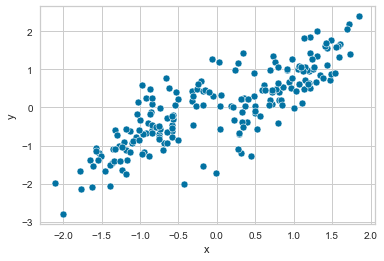

In [7]:
sns.scatterplot(x=d1['x'], y=d1['y'])

**Kmeans**

In [8]:
def kmeans(dataset,k):
    model = KMeans(n_clusters=k, random_state=42) 
    kmeans_d = model.fit(dataset)
    return kmeans_d.labels_,kmeans_d.cluster_centers_

In [9]:
#elbow method to determine the best k
def elbow(dataset):
    visualizer = KElbowVisualizer(KMeans(), k=(2,12))
    visualizer.fit(dataset)        # Fit the data to the visualizer
    visualizer.show() 

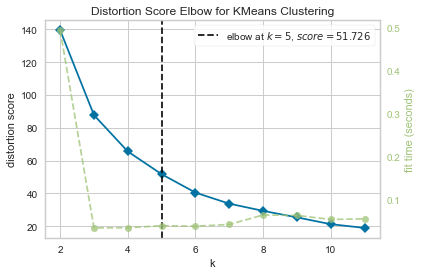

In [10]:
elbow(d1)

In [194]:
#I chose 4 cause there is no almost no difference in silhouette_score between 4 or 5 clusters and I see from the figure that is 4 is well divided 
labels_kmeans_1,centroids1=kmeans(d1,4)
print(labels_kmeans_1)


[0 2 0 0 0 2 0 2 0 2 0 0 2 2 2 0 2 3 3 0 2 2 2 0 0 2 2 2 0 2 0 0 0 2 0 2 2
 2 3 0 0 2 0 2 2 0 2 0 2 0 0 2 0 0 0 0 0 0 3 0 2 0 0 0 2 0 0 0 0 0 2 2 0 2
 2 0 0 0 2 2 0 0 0 2 2 0 2 2 0 0 0 2 0 0 2 2 2 2 0 0 3 1 2 0 3 3 3 3 3 1 3
 0 1 1 1 1 1 2 1 3 1 1 3 3 1 1 1 1 3 2 1 2 3 1 1 1 2 1 1 3 3 1 2 2 3 0 1 1
 1 3 3 1 3 1 2 3 3 1 3 3 2 2 1 3 1 2 1 1 3 1 1 1 1 1 1 2 1 3 2 1 1 3 3 1 1
 1 0 3 3 1 3 1 3 0 1 1 1 1 1 3]


In [195]:
silhouette_score(d1,labels_kmeans_1)

0.4103056559675759

In [9]:
def plotting_k(uniqelabels,centroids,labels_kmeans,d):
    for i in uniqelabels:
        
    
        plt.scatter(d[labels_kmeans == i ].x , d[labels_kmeans == i ].y )
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
    plt.legend()
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


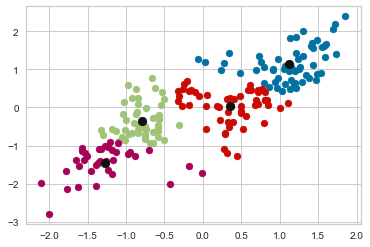

In [196]:
u_labels = np.unique(labels_kmeans_1)
plotting_k(u_labels,centroids1,labels_kmeans_1,d1)

**Agglomerative**

In [12]:
def dendo(data,method,metric):
    plt.figure(figsize=(10, 7))
    plt.title("Counters Dendograms")
    return shc.dendrogram(shc.linkage(y=data , method=method,metric=metric),orientation='top')

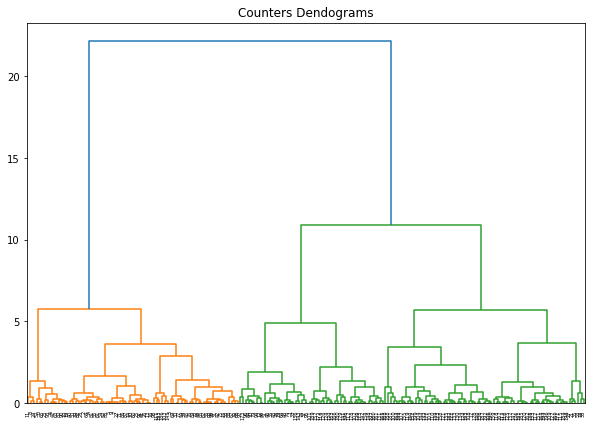

In [13]:
dend=dendo(d1,'ward','euclidean')

In [14]:
def Agglomerative(n_clus,linkage,affinity,d):
    hc = AgglomerativeClustering(n_clusters = n_clus, affinity = affinity, linkage = linkage)
    y_hc = hc.fit_predict(d)
    return(y_hc)

In [15]:
y_hc=Agglomerative(3,'ward','euclidean',d1)
y_hc

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 1, 2, 2, 1, 0, 0, 0, 0, 2,
       2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 2,
       1, 1], dtype=int64)

In [16]:
silhouette_score(d1, y_hc, metric='euclidean')

0.41567707625984956

**DBSCAN**

In [17]:
from collections import Counter
def dbscan(data):
    for i in np.arange (0.1,5,0.1):
        for j in range (4,7):
            clusters = DBSCAN(eps = i, min_samples = j).fit(data)
            if len(set(clusters.labels_))!=1:
                print(f"eps is {i}, min_sam is {j} ")
                print(clusters.labels_)
                print(Counter(clusters.labels_))
                print(silhouette_score(data,clusters.labels_))

In [18]:
dbscan(d1)


eps is 0.1, min_sam is 4 
[-1 -1 -1 -1 -1  0 -1  0 -1  0 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  0 -1
 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  5 -1 -1 -1  5 -1  4 -1 -1 -1 -1
  2 -1 -1 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1  2 -1  4 -1 -1 -1
 -1  4 -1  4 -1 -1 -1  3  2 -1 -1 -1 -1 -1 -1 -1  4  2 -1 -1 -1 -1 -1  2
 -1 -1  5 -1 -1 -1  4 -1]
Counter({-1: 166, 1: 9, 0: 7, 4: 6, 2: 5, 3: 4, 5: 3})
-0.43733264734404814
eps is 0.1, min_sam is 5 
[-1 -1 -1 -1 -1  0 -1  0 -1  0 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  0 -1
 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 

In [19]:
def plot_db(eps,min_samples,d):
    clusters = DBSCAN(eps = eps, min_samples = min_samples).fit(d)

    p = sns.scatterplot(data = d, x = d['x'], y = d['y'], hue = clusters.labels_, legend = "full", palette = "tab10")
    sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
    plt.show()

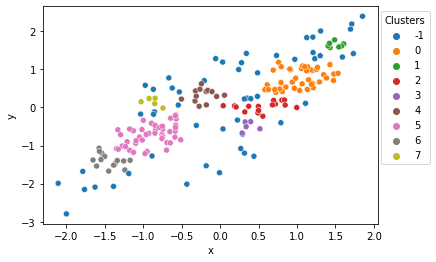

In [20]:
plot_db(0.2,5,d1)

## Dataset 2

In [21]:
d2 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM2.csv")
d2.head()



,x,y
0,1.578527,1.408111
1,1.748206,0.441915
2,1.523151,0.681521
3,1.318949,0.362971
4,0.977164,-0.373589


In [22]:
d2.isna().sum()

x    0
y    0
dtype: int64

<AxesSubplot: xlabel='x', ylabel='y'>

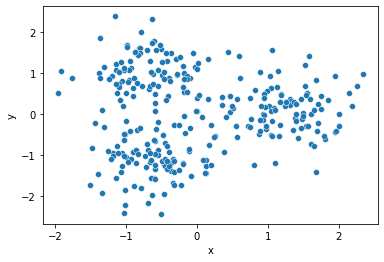

In [23]:
sns.scatterplot(x=d2['x'], y=d2['y'])


**Kmeans**

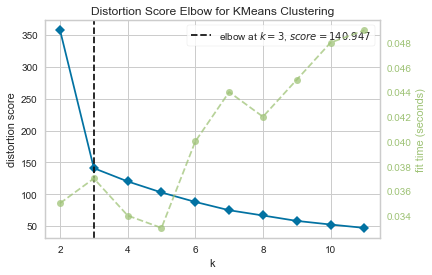

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [173]:
visualizer = KElbowVisualizer(KMeans(), k=(2,12))
visualizer.fit(d2)        # Fit the data to the visualizer
visualizer.show() 

In [24]:
labels_kmeans_2,centroids2=kmeans(d2,3)
print(labels_kmeans_2)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


In [25]:
silhouette_score(d2,labels_kmeans_2)

0.5583157663135309

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


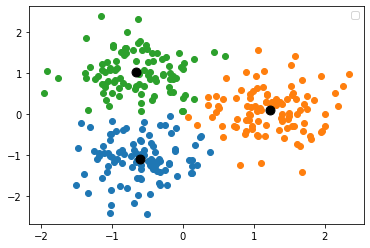

In [26]:
u_labels2 = np.unique(labels_kmeans_2)
plotting_k(u_labels2,centroids2,labels_kmeans_2,d2)

**Agglomerative**

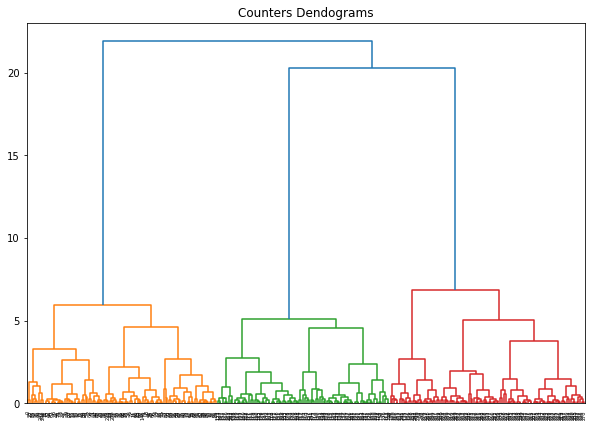

In [27]:
dend=dendo(d2,'ward','euclidean')

In [28]:
y_hc2=Agglomerative(3,'ward','euclidean',d2)
print(y_hc2)
silhouette_score(d2, y_hc2, metric='euclidean')

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 0 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 1 0
 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


0.5331004784160976

**DBSCAN**

In [29]:
dbscan(d2)


eps is 0.1, min_sam is 4 
[-1 -1 -1  0 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1
  1 -1 -1 -1 -1 -1  0  0  0 -1  1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  1 -1 -1 -1 -1 -1  0
 -1  0  0 -1  2 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  0 -1
 -1 -1  2 -1 -1  3  4 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  5  3 -1 -1  4 -1
  6 -1 -1 -1 -1 -1  3  4 -1 -1 -1 -1 -1 -1 -1 -1  3  3 -1  3 -1 -1 -1 -1
 -1 -1 -1 -1 -1  3 -1 -1 -1  3 -1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1  5  3
 -1 -1 -1  5 -1 -1 -1  6  5 -1 -1 -1 -1 -1  6  4 -1  3 -1 -1 -1 -1 -1 -1
 -1  6 -1 -1 -1 -1 -1 -1 -1 -1  7  8 -1 -1 -1  7 -1 -1 -1 -1 10  8 -1  9
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  9 -1 10 -1 -1 -1
 -1  9 -1 -1 -1 -1 -1 -1  7 -1 10 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  8 -1  7  8 -1 -1 -1 -1 10  7 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  9 10 -1 -1 -1 -1 -1 -1 -1 -1]
Counter({-1: 239, 0: 11, 3: 11, 1: 5, 7: 5, 10: 5, 2: 4, 4: 

eps is 0.4, min_sam is 6 
[-1  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  0 -1  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0
  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 -1  0]
Counter({0: 284, -1: 16})
0.24862022960887137
eps is 0.5, mi

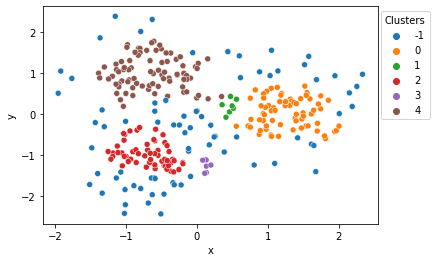

In [51]:
# eps is 0.2, min_sam is 4 
plot_db(0.2,4,d2)

## Dataset 3

In [52]:
d3 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM3.csv")
d3.head()


,x,y
0,1.332228,0.178299
1,1.256056,0.146765
2,1.477661,0.155054
3,1.384840,0.022054
4,1.526956,0.267920


In [53]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    float64
 1   y       300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


<AxesSubplot: xlabel='x', ylabel='y'>

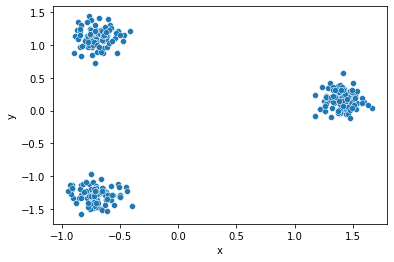

In [54]:
sns.scatterplot(x=d3['x'], y=d3['y'])

**Kmeans**

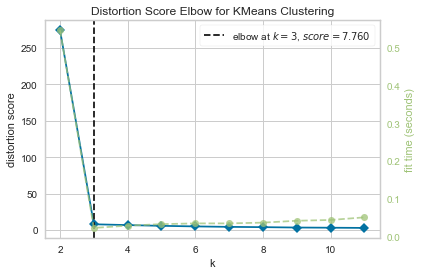

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [172]:
#elbow
visualizer = KElbowVisualizer(KMeans(), k=(2,12))
visualizer.fit(d3)        # Fit the data to the visualizer
visualizer.show() 

In [55]:
labels_kmeans_3,centroids3=kmeans(d3,3)
print(labels_kmeans_3)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [56]:
silhouette_score(d3,labels_kmeans_3)

0.913619050733588

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


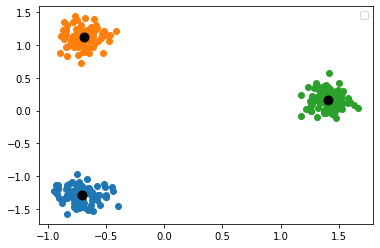

In [57]:
u_labels3 = np.unique(labels_kmeans_3)
plotting_k(u_labels3,centroids3,labels_kmeans_3,d3)

**Agglomerative**

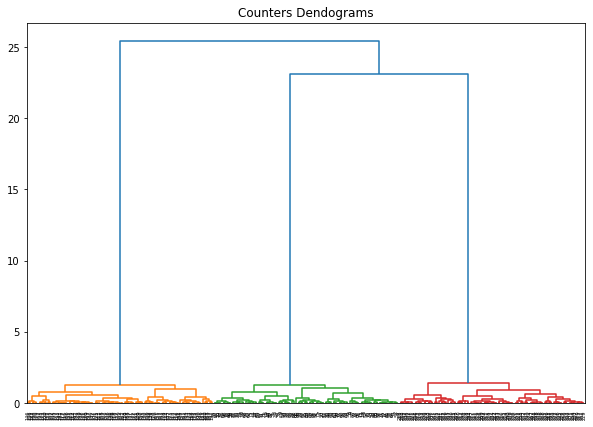

In [58]:
dend=dendo(d3,'ward','euclidean')

In [59]:
y_hc3=Agglomerative(3,'ward','euclidean',d3)
print(y_hc3)
silhouette_score(d3, y_hc3, metric='euclidean')

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


0.913619050733588

**DBSCAN**

In [60]:
dbscan(d3)
#best : eps is 0.2, min_sam is 6

eps is 0.1, min_sam is 4 
[ 0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2 -1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2 -1  2  2  2  2  2  2  2  2  2 -1  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2]
Counter({0: 97, 1: 97, 2: 97, -1: 9})
0.8365571322119059
eps

eps is 0.5, min_sam is 5 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]
Counter({0: 100, 1: 100, 2: 100})
0.913619050733588
eps is 0.5, min_sam is 6 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

eps is 0.9, min_sam is 6 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]
Counter({0: 100, 1: 100, 2: 100})
0.913619050733588
eps is 1.0, min_sam is 4 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

0.913619050733588
eps is 1.5000000000000002, min_sam is 6 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]
Counter({0: 100, 1: 100, 2: 100})
0.913619050733588
eps is 1.6, min_sam is 4 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1

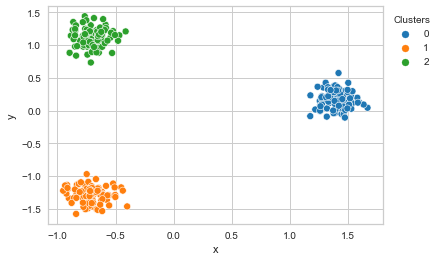

In [171]:
plot_db(0.2,6,d3)

## Dataset 4

In [63]:
d4 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM4.csv")
d4.head()


,x,y
0,-0.006848,0.395527
1,0.314820,-0.289261
2,0.171705,1.078077
3,-1.203661,1.325926
4,-0.179379,-0.036615


In [64]:
d4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       600 non-null    float64
 1   y       600 non-null    float64
dtypes: float64(2)
memory usage: 9.5 KB


<AxesSubplot: xlabel='x', ylabel='y'>

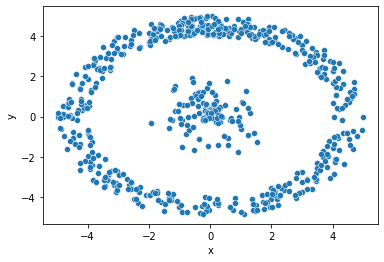

In [66]:
sns.scatterplot(x=d4['x'], y=d4['y'])

**Kmeans**

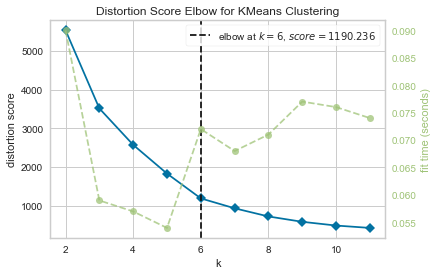

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [92]:
#elbow
visualizer = KElbowVisualizer(KMeans(), k=(2,12))
visualizer.fit(d4)        # Fit the data to the visualizer
visualizer.show() 

In [85]:
labels_kmeans_4,centroids4=kmeans(d4,6)
print(labels_kmeans_4)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 5 5 2 2 3 5 0 3 2
 2 0 5 0 4 2 2 4 4 2 3 4 2 5 2 2 2 3 0 3 2 0 3 2 2 0 2 2 5 3 2 5 4 4 5 5 3
 2 3 4 2 5 2 5 4 3 4 2 0 5 5 2 3 0 2 2 0 0 3 4 5 5 0 5 3 0 4 3 4 5 2 3 4 2
 5 2 5 3 2 5 2 0 5 2 2 5 5 4 5 2 3 3 0 3 3 4 2 5 0 3 0 0 5 2 3 4 0 2 5 5 0
 3 4 3 2 3 3 2 3 3 0 3 0 2 2 5 5 3 3 2 0 2 0 2 2 2 3 2 4 0 0 2 5 5 2 3 2 4
 0 2 2 4 0 2 0 2 3 4 0 0 4 3 2 4 4 2 4 5 4 3 4 5 2 2 0 3 2 4 5 5 4 0 3 4 4
 5 5 4 4 5 2 0 5 3 0 0 4 2 5 0 0 2 3 5 3 5 0 2 2 4 2 4 2 4 4 5 0 2 4 2 0 5
 2 5 4 5 0 3 2 3 2 2 0 4 2 0 2 0 2 2 3 4 2 0 4 0 5 3 0 2 3 2 0 4 2 0 2 5 2
 0 2 2 3 0 4 2 2 0 2 4 2 2 2 4 2 2 4 5 0 5 5 4 3 5 5 4 0 2 5 5 2 5 2 0 2 3
 2 4 0 4 2 2 4 0 4 2 5 2 2 4 5 3 2 3 2 2 5 5 4 2 3 0 5 5 2 3 2 4 5 0 2 2 5
 0 4 2 5 3 0 3 0 3 2 5 0 2 0 3 3 2 5 5 2 0 3 3 5 3 2 2 3 4 4 2 2 2 2 5 3 2
 4 0 3 3 2 5 3 4 5 3 5 2 

In [86]:
silhouette_score(d4,labels_kmeans_4)

0.5435028641729902

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


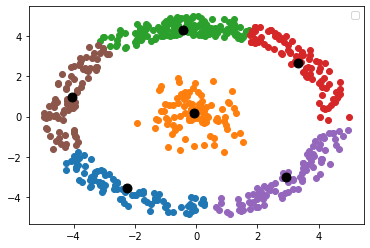

In [87]:
u_labels4 = np.unique(labels_kmeans_4)
plotting_k(u_labels4,centroids4,labels_kmeans_4,d4)

**Agglomerative**

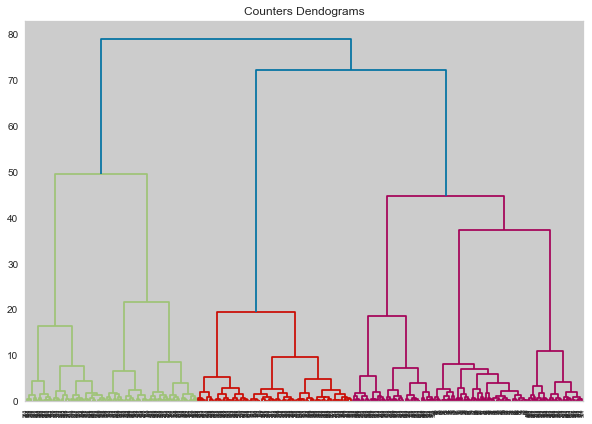

In [93]:
dend=dendo(d4,'ward','euclidean')

In [99]:
y_hc4=Agglomerative(6,'ward','euclidean',d4)
print(y_hc4)
silhouette_score(d4, y_hc4, metric='euclidean')

[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 2 0 0 2 2 4 0 3 4 2
 2 3 0 3 1 2 2 1 1 2 4 1 2 0 2 2 2 4 3 4 0 3 4 2 2 3 2 2 0 4 2 0 1 1 0 0 4
 2 2 1 2 0 2 0 1 4 1 2 3 0 0 2 2 3 2 2 3 3 2 1 0 0 3 0 4 3 1 4 1 0 2 4 1 2
 0 2 0 4 2 0 0 3 0 2 2 0 0 1 0 2 4 4 3 4 2 1 2 0 3 4 3 3 0 2 2 1 3 2 0 0 3
 2 1 4 2 4 4 2 2 2 3 2 3 2 2 0 0 4 2 2 3 2 3 2 2 0 4 2 1 3 3 2 0 0 2 4 2 1
 3 2 0 1 3 2 3 0 4 1 3 3 1 4 2 1 1 0 1 0 1 4 1 0 2 2 3 4 2 1 0 0 1 3 4 1 1
 0 0 1 1 0 2 3 0 4 3 3 1 2 0 3 3 2 4 0 2 0 3 2 2 1 2 1 0 1 1 0 3 2 1 2 3 0
 2 0 1 0 3 2 2 4 2 2 3 1 2 3 2 3 2 2 4 1 2 3 1 3 0 2 3 2 4 2 3 1 2 3 2 0 2
 3 2 2 4 3 1 2 2 3 2 1 2 2 2 1 2 2 1 0 3 0 0 1 2 0 0 1 3 2 0 0 2 0 2 3 2 4
 2 1 3 1 2 2 1 3 1 2 0 2 2 1 0 4 2 2 2 2 0 0 1 2 2 3 0 0 2 4 2 1 0 3 2 2 0
 3 1 2 0 4 3 4 3 4 2 0 3 2 3 4 4 2 0 0 2 3 4 4 0 4 0 2 4 1 1 2 2 2 2 0 4 2
 1 3 2 4 0 0 2 1 0 4 0 2 

0.5374567295884447

**DBSCAN**

In [100]:
dbscan(d4)
# eps is 0.6, min_sam is 4 

eps is 0.1, min_sam is 4 
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  0 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1  1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0
 -1 -1 -1 -1 -1  2 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2  7 -1 -1
  2 -1 -1 -1  5 -1 -1  2 -1 -1 -1 -1 -1 -1  2 -1 -1  3 -1 -1 -1 -1 -1 -1
 -1 -1  5 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  4 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  4 -1  5 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  6 -1 -1 -1 -1  3 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  9 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  6 -1 -1 -1 -1
 -1 -1 -1 -1  8 -1 -1 -1 -1 -1  8 -1 -1 -1 -1 -1 -1 -1 -1  7  3 -1 -1 -1
 -1 -1 -1 -1 -1 -1  8 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 

0.009397355895598578
eps is 0.4, min_sam is 4 
[ 0  0  0 -1  0  0 -1  0  0  0 -1 -1 -1  0  0  0  0  0  0  0 -1  0 -1  0
 -1  0  0  0  0  0  0  0  0 -1  0  1 -1  0  0  0 -1 -1 -1  0  1  0  0  0
  0  0  0  0  0  0  0  0  0 -1  0 -1  1  0  0  0  0  0  0  0  0  0  1  0
  0  0  0  0  0  0  1  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0 -1  0  0
  0  0 -1  0  2  2  5  3  2  2  2  2  4  2  2  2  4  5  4  6  2  2  6  6
  2  2  6  2  2  2  2  2  2  4  2  2  4  2  2  2  4  2  2  2  2  2  3 -1
  6  3  2  2  2  2  6  2  2  2  4  6  2  6  2  4  2  3  2  2  4  2  2  4
  4  2  6  4  5  4  3  2  4  6  2  6  5  2  2  6  2  3  2  5  2  2  3  2
  4  4  2  2  2  2  6  3  2  2  2  4  2  2  6  2  5  4  2  4  4  4  2  2
  6  4  2  2  3  4  2 -1  2  2  2 -1  2  2  2  4  2  4  2  2  3  3  2  2
  2  4  2  4  2  2  2  2  2  6  4  4  2  2  5  2  2  2  6  4  2  2  6  4
  2  4  2  2  6  4  4  6  2  2  6  6  2  6  4  6  2  6  2  2  2  4 -1  2
  6  3  5  6  4  2  6  6  5  3  6  6  3  2  4  3  2  4  4  6  2  4  4  4
  2 

eps is 0.6, min_sam is 5 
[ 0  0  0 -1  0  0  0  0  0  0 -1  0  1  0  0  0  0  0  0  0  0  0  1  0
  1  0  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0  1  1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0
  0  0 -1  0  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 -1  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2 

eps is 0.9, min_sam is 4 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

-0.03727820121544371
eps is 1.1, min_sam is 6 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

eps is 1.4000000000000001, min_sam is 4 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

-0.03727820121544371
eps is 1.6, min_sam is 6 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

-0.03727820121544371
eps is 1.9000000000000001, min_sam is 4 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

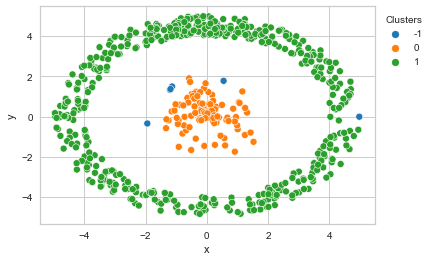

In [103]:
plot_db(0.6,4,d4)

### Compare

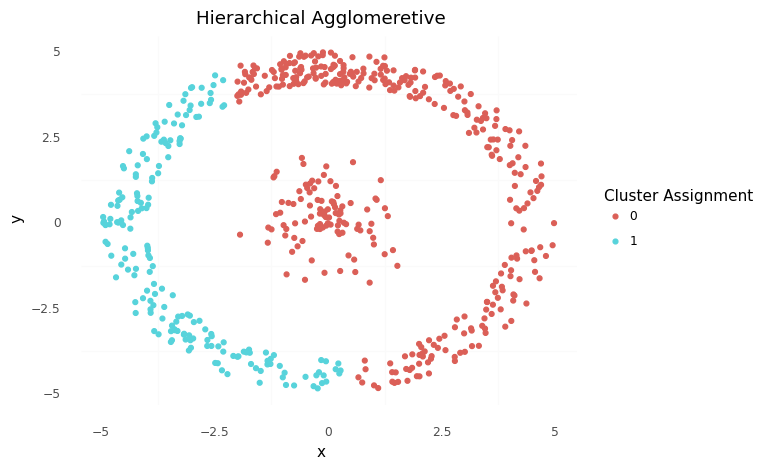

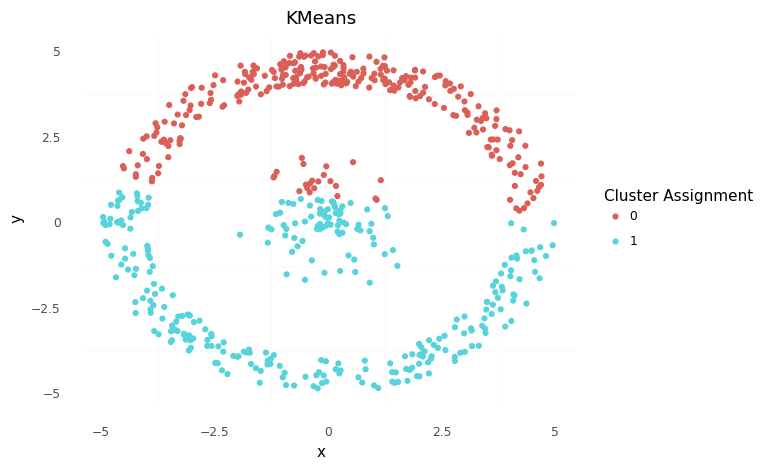

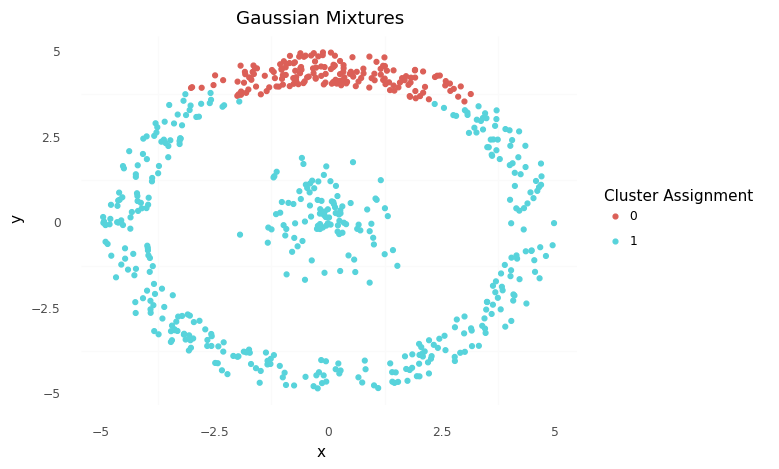

In [104]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

hac = AgglomerativeClustering(2)
km = KMeans(2)
gm = GaussianMixture(2)

hac.fit(d4[["x","y"]])
km.fit(d4[["x","y"]])
gm.fit(d4[["x","y"]])

d4["hac"] = hac.labels_
d4["km"] = km.labels_
d4["gm"] = gm.predict(d4[["x","y"]])


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))

## Dataset 5

In [106]:
d5 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM5.csv")
d5.head()

,x,y
0,2.852449,-0.324568
1,2.346342,-0.729224
2,2.229033,-0.599340
3,2.458669,-0.385467
4,2.844177,-0.196813


In [107]:
d5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       450 non-null    float64
 1   y       450 non-null    float64
dtypes: float64(2)
memory usage: 7.2 KB


<AxesSubplot: xlabel='x', ylabel='y'>

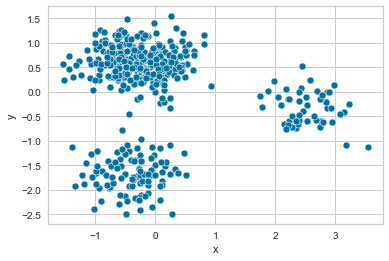

In [108]:
sns.scatterplot(x=d5['x'], y=d5['y'])

**Kmeans**

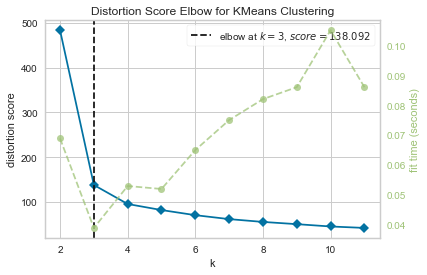

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [109]:
#elbow
visualizer = KElbowVisualizer(KMeans(), k=(2,12))
visualizer.fit(d5)        # Fit the data to the visualizer
visualizer.show() 

In [114]:
labels_kmeans_5,centroids5=kmeans(d5,3)
print(labels_kmeans_5)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]


In [115]:
silhouette_score(d5,labels_kmeans_5)

0.7043537508086658

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


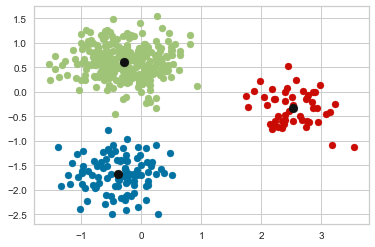

In [116]:
u_labels5 = np.unique(labels_kmeans_5)
plotting_k(u_labels5,centroids5,labels_kmeans_5,d5)

**Agglomerative**

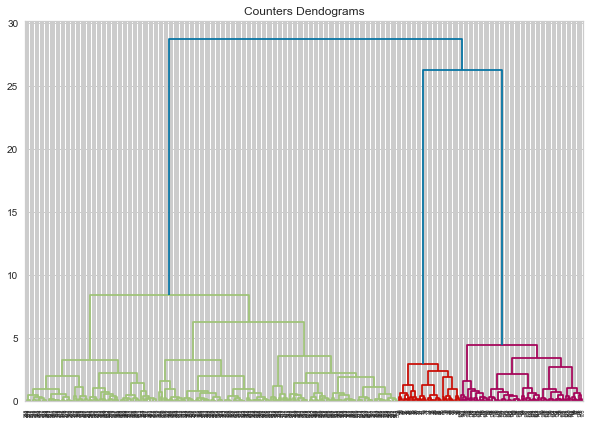

In [117]:
dend=dendo(d5,'ward','euclidean')

In [118]:
y_hc5=Agglomerative(3,'ward','euclidean',d5)
print(y_hc5)
silhouette_score(d5, y_hc5, metric='euclidean')

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


0.7031189213721806

**DBSCAN**

In [119]:
dbscan(d5)
# 0.30000000000000004, min_sam is 4 

eps is 0.1, min_sam is 4 
[-1  1  0 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1  0 -1
 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  1
 -1 -1  2  6  2  2  2  3 -1 -1  2 -1  3 -1  4  2 -1 -1 -1  4 -1  3 -1  2
 -1 -1 -1 -1 -1 -1 -1 -1 -1  5  2 -1  2 -1 -1  6 -1 -1 -1 -1 -1  5 -1 -1
 -1 -1 -1 -1 -1 -1  5 -1  3 -1  2 -1 -1 -1  2 -1 -1 -1 -1 -1  2 -1  6  6
  2 -1 -1 -1  2  2  2 -1  5 -1  2  2  2 -1  4  6  4 -1 -1  4 -1 -1 -1 -1
 -1 -1  6 -1 -1 -1  7  7  7  7 -1 -1  7  7  7  7  7  7  9  7  7  8  7  7
 -1  7  7  7 -1  7  7  7  7  7  9  7  7  7  7  7  7  7  7  7  7 -1  7 -1
  7  7 -1  7  7  7  7  7 -1 -1  7  7 10  7 -1  7  7  8  7  7 -1  7  7  7
  7  7  7  7  7  7 -1  7 -1 -1 -1  7  7  7  7  7  7  7  7 -1  8 -1  7  7
  7 -1 -1 10  7 11  7  7  7  7 -1  7  7  7  7  7  7  7 -1 -1  7  7  7  7
  7  7 10  7  7 -1 -1 -1  7  7  7  7  7  7  7  7  7  7  7 -1  7  7  9  7
  7  7  7  7  7  7  7  7  7  7  7 11 -1  7  7  7  7  8 -1  7  7  7  7  7
  7  7 -1  7  7  9  7 -1 

0.5539973364138469
eps is 0.4, min_sam is 5 
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2

0.588003566940651
eps is 0.7000000000000001, min_sam is 5 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
Counter({1: 400, 0: 50})
0.

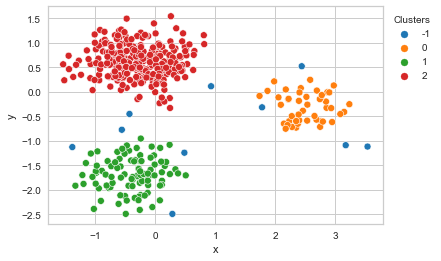

In [165]:
plot_db(0.3,4,d5)

## Dataset 6

In [125]:
d6 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM6.csv")
d6.head()

,x,y
0,0.712520,0.653491
1,0.910914,0.068242
2,0.750752,0.526512
3,0.666605,0.584747
4,0.403062,0.956459


In [126]:
d6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    float64
 1   y       300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


<AxesSubplot: xlabel='x', ylabel='y'>

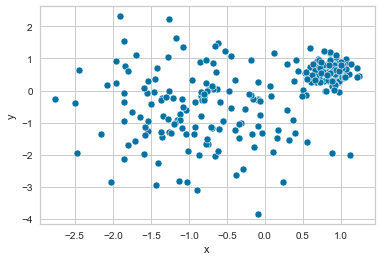

In [127]:
sns.scatterplot(x=d6['x'], y=d6['y'])

**Kmeans**

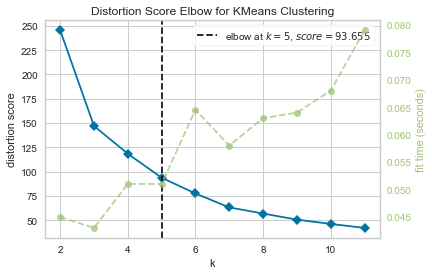

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [128]:
#elbow
visualizer = KElbowVisualizer(KMeans(), k=(2,12))
visualizer.fit(d6)        # Fit the data to the visualizer
visualizer.show() 

In [146]:
labels_kmeans_6,centroids6=kmeans(d6,5)
print(labels_kmeans_6)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 1 1 2 3 3 1 0 0 2 3 1 3 3 3 4 1 3 1 4 3 3 4 3 2 2 0 4 0 0 3 1 1 2 3
 3 3 4 0 3 4 1 3 3 1 1 1 1 1 4 3 4 4 3 4 1 2 3 1 4 1 4 3 4 1 4 3 0 3 1 3 4
 4 3 4 0 3 0 3 3 0 3 3 3 2 3 3 3 4 3 1 1 3 3 1 3 1 3 3 1 0 3 4 0 1 0 1 4 1
 2 1 4 3 4 1 4 2 4 4 1 4 3 3 1 0 4 0 3 4 4 1 3 0 1 0 3 4 0 2 4 3 0 3 4 3 0
 4 3 0 1]


In [147]:
silhouette_score(d6,labels_kmeans_6)

0.5695773012672769

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


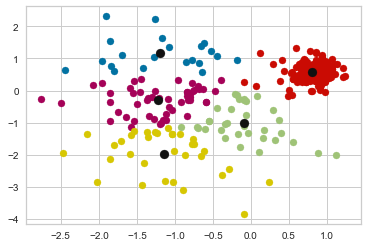

In [148]:
u_labels6 = np.unique(labels_kmeans_6)
plotting_k(u_labels6,centroids6,labels_kmeans_6,d6)

**Agglomerative**

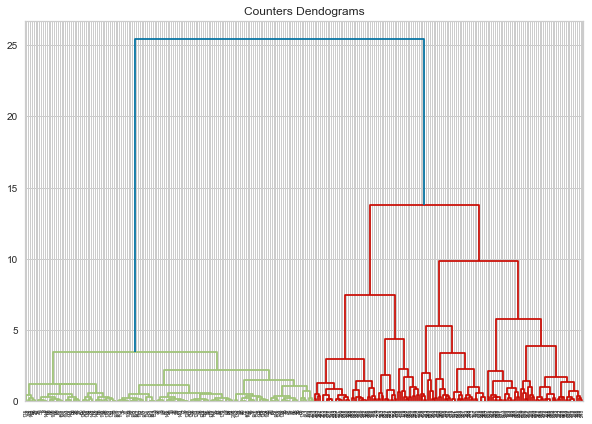

In [149]:
dend=dendo(d6,'ward','euclidean')

In [159]:
y_hc6=Agglomerative(2,'ward','euclidean',d6)
print(y_hc6)
silhouette_score(d6, y_hc6, metric='euclidean')

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


0.5538801329572542

**DBSCAN**

In [160]:
dbscan(d6)

eps is 0.1, min_sam is 4 
[ 0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  1 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0 -1  0  0  0 -1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  1 -1  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0  0  1  0  0 -1  3 -1  2 -1 -1  3 -1 -1 -1 -1 -1  2  4 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  4 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1  4 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  4 -1 -1 -1  3 -1  3 -1 -1 -1 -1
 -1 -1  4  4 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  4 -1 -1]
Counter({-1: 147, 0: 134, 4: 7, 1: 4, 3: 4, 2: 4})
0.0391286

0.5358400753998106
eps is 0.9, min_sam is 5 
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0]
Counter({0: 299, -1: 1})
0.53584007539981

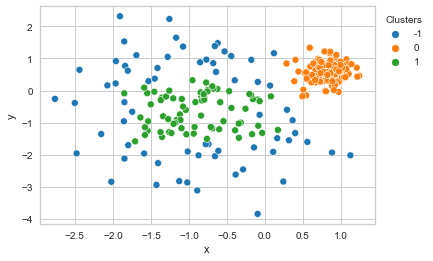

In [170]:
plot_db(0.304,6,d6)